In [1]:
#Choose CMIP Models bsed on ENSO diversity

In [2]:
#import my functions
import helpers.fileHandler as fh
import utils._modelDefinitions as _model
import utils._indexDefinitions as _index

In [3]:
import xarray
import numpy
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

from eofs.xarray import Eof

In [4]:
import warnings
warnings.filterwarnings('ignore')

For all models, calculate the alpha, and plot eof 1 and 2. The alpha is based on monthly eof1/2 for Dec-Jan-Feb only



In [6]:
#modelSet=_model.scenarioMip[[4,6,7,29,30,31,32,33,34,36,37],:]

In [7]:
modelSet=_model.scenarioMip

In [8]:
modelSet

array([['CSIRO-ARCCSS', 'ACCESS-CM2', 'r1i1p1f1', 'r1i1p1f1'],
       ['CSIRO', 'ACCESS-ESM1-5', 'r1i1p1f1', 'r1i1p1f1'],
       ['AWI', 'AWI-CM-1-1-MR', 'r1i1p1f1', 'r1i1p1f1'],
       ['BCC', 'BCC-CSM2-MR', 'r1i1p1f1', 'r1i1p1f1'],
       ['CAMS', 'CAMS-CSM1-0', 'r1i1p1f1', 'r1i1p1f1'],
       ['CAS', 'CAS-ESM2-0', 'r1i1p1f1', 'r1i1p1f1'],
       ['NCAR', 'CESM2', 'r1i1p1f1', 'r10i1p1f1'],
       ['NCAR', 'CESM2-WACCM', 'r1i1p1f1', 'r1i1p1f1'],
       ['THU', 'CIESM', 'r1i1p1f1', 'r1i1p1f1'],
       ['CMCC', 'CMCC-CM2-SR5', 'r1i1p1f1', 'r1i1p1f1'],
       ['CMCC', 'CMCC-ESM2', 'r1i1p1f1', 'r1i1p1f1'],
       ['CNRM-CERFACS', 'CNRM-CM6-1', 'r1i1p1f2', 'r1i1p1f2'],
       ['CNRM-CERFACS', 'CNRM-ESM2-1', 'r1i1p1f2', 'r1i1p1f2'],
       ['CCCma', 'CanESM5', 'r1i1p1f1', 'r1i1p1f1'],
       ['CCCma', 'CanESM5-CanOE', 'r1i1p2f1', 'r1i1p2f1'],
       ['EC-Earth-Consortium', 'EC-Earth3', 'r1i1p1f1', 'r1i1p1f1'],
       ['EC-Earth-Consortium', 'EC-Earth3-CC', 'r1i1p1f1', 'r1i1p1f1'],
       ['

ACCESS-CM2
ACCESS-CM2
-0.1468771787638482


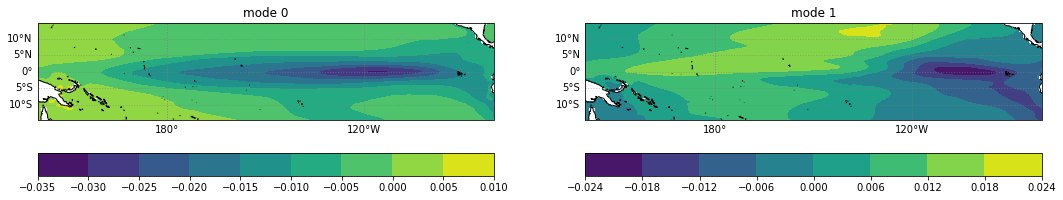

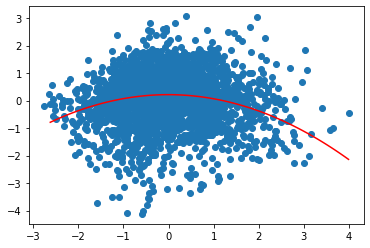

ACCESS-ESM1-5
ACCESS-ESM1-5
-0.1354072866028132


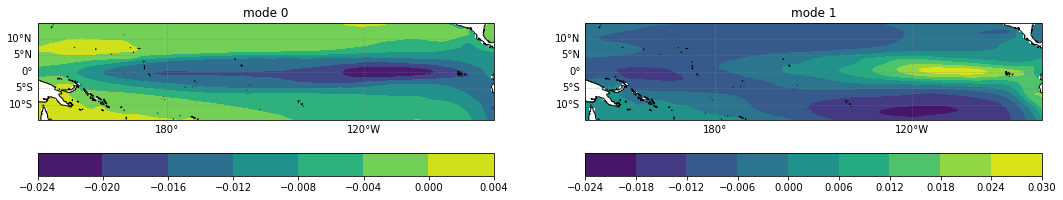

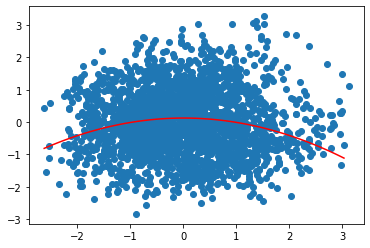

AWI-CM-1-1-MR
AWI-CM-1-1-MR
-0.2564307195863501
Input z must be 2D, not 1D
BCC-CSM2-MR
BCC-CSM2-MR
CMIP6.CMIP.BCC.BCC-CSM2-MR.historical.r1i1p1f1.Omon.tos.gn.v20181126|cmip.bcc.cma.cn downloading
CMIP6.CMIP.BCC.BCC-CSM2-MR.historical.r1i1p1f1.Omon.tos.gn.v20181126|aims3.llnl.gov downloading
CMIP6.CMIP.BCC.BCC-CSM2-MR.historical.r1i1p1f1.Omon.tos.gn.v20181126|esgf-data3.diasjp.net downloading
CMIP6.CMIP.BCC.BCC-CSM2-MR.historical.r1i1p1f1.Omon.tos.gn.v20181126|esgf3.dkrz.de downloading
CMIP6.CMIP.BCC.BCC-CSM2-MR.historical.r1i1p1f1.Omon.tos.gn.v20181126|esgf.nci.org.au downloading
CMIP6.CMIP.BCC.BCC-CSM2-MR.historical.r1i1p1f1.Omon.tos.gn.v20181126|esgf-data3.ceda.ac.uk downloading
the new name 'lat' conflicts
CAMS-CSM1-0
CAMS-CSM1-0
-0.27202578230368096


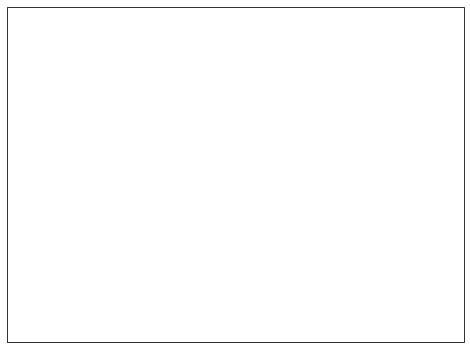

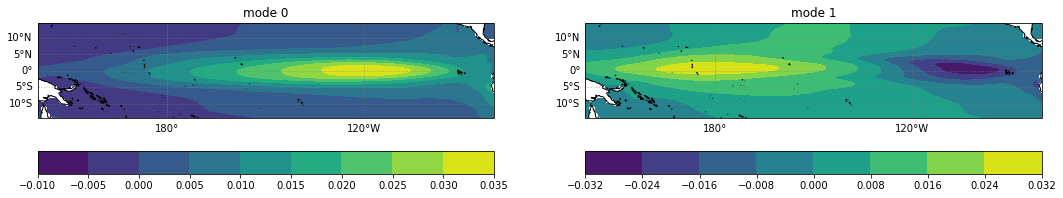

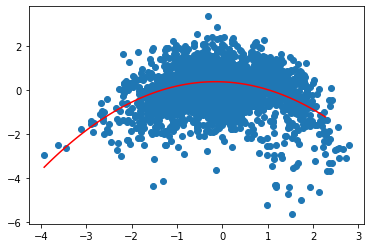

CAS-ESM2-0
CAS-ESM2-0
CMIP6.CMIP.CAS.CAS-ESM2-0.historical.r1i1p1f1.Omon.tos.gn.v20201228|esg.lasg.ac.cn downloading
CMIP6.CMIP.CAS.CAS-ESM2-0.historical.r1i1p1f1.Omon.tos.gn.v20200306|esgf-data3.ceda.ac.uk downloading
CMIP6.ScenarioMIP.CAS.CAS-ESM2-0.ssp585.r1i1p1f1.Omon.tos.gn.v20201230|esg.lasg.ac.cn downloading
CMIP6.ScenarioMIP.CAS.CAS-ESM2-0.ssp585.r1i1p1f1.Omon.tos.gn.v20201230|esgf-data3.diasjp.net downloading
CMIP6.ScenarioMIP.CAS.CAS-ESM2-0.ssp585.r1i1p1f1.Omon.tos.gn.v20201230|esgf-data1.llnl.gov downloading
CMIP6.ScenarioMIP.CAS.CAS-ESM2-0.ssp585.r1i1p1f1.Omon.tos.gn.v20201230|esgf-data3.ceda.ac.uk downloading
-0.23754403416699432


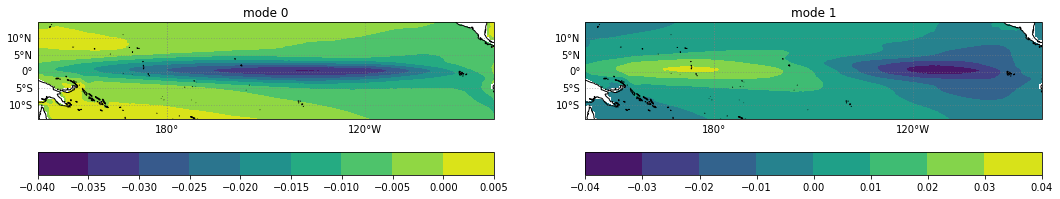

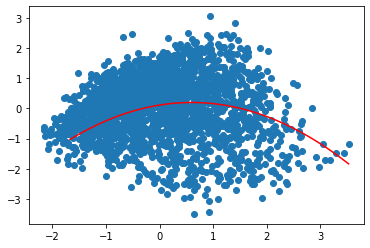

CESM2
CESM2
-0.19426137531583706


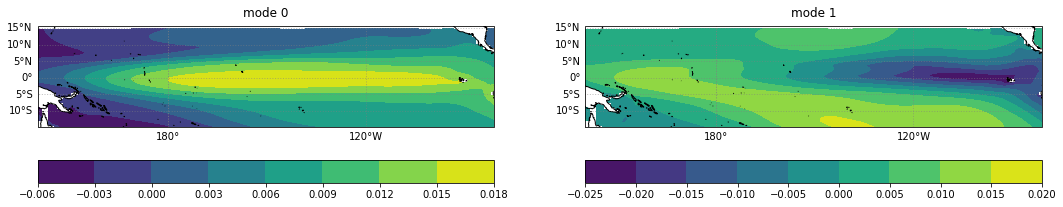

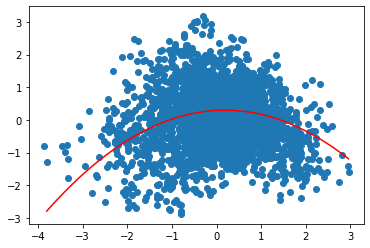

CESM2-WACCM
CESM2-WACCM
-0.22208288864814313


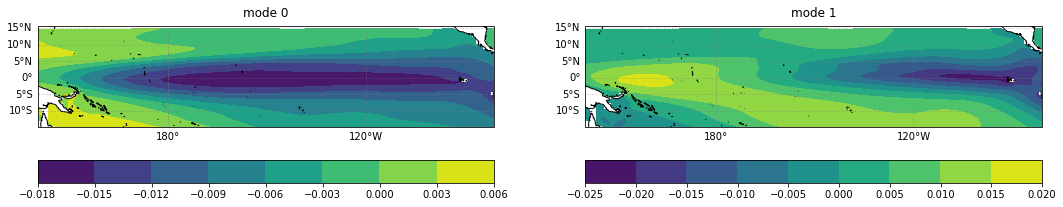

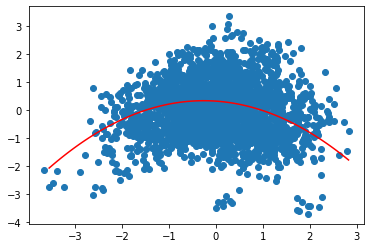

CIESM
CIESM
CMIP6.CMIP.THU.CIESM.historical.r1i1p1f1.Omon.tos.gn.v20200220|esgf-data3.diasjp.net downloading
CMIP6.CMIP.THU.CIESM.historical.r1i1p1f1.Omon.tos.gn.v20200220|cmip.dess.tsinghua.edu.cn downloading
CMIP6.CMIP.THU.CIESM.historical.r1i1p1f1.Omon.tos.gn.v20200220|esgf3.dkrz.de downloading
CMIP6.CMIP.THU.CIESM.historical.r1i1p1f1.Omon.tos.gn.v20200220|esgf-data3.ceda.ac.uk downloading
CMIP6.ScenarioMIP.THU.CIESM.ssp585.r1i1p1f1.Omon.tos.gn.v20200220|esgf-data3.diasjp.net downloading
CMIP6.ScenarioMIP.THU.CIESM.ssp585.r1i1p1f1.Omon.tos.gn.v20200220|cmip.dess.tsinghua.edu.cn downloading
CMIP6.ScenarioMIP.THU.CIESM.ssp585.r1i1p1f1.Omon.tos.gn.v20200220|esgf-data1.llnl.gov downloading
CMIP6.ScenarioMIP.THU.CIESM.ssp585.r1i1p1f1.Omon.tos.gn.v20200220|esgf3.dkrz.de downloading
CMIP6.ScenarioMIP.THU.CIESM.ssp585.r1i1p1f1.Omon.tos.gn.v20200220|esgf.nci.org.au downloading
CMIP6.ScenarioMIP.THU.CIESM.ssp585.r1i1p1f1.Omon.tos.gn.v20200220|esgf-data3.ceda.ac.uk downloading
-0.1813567221628

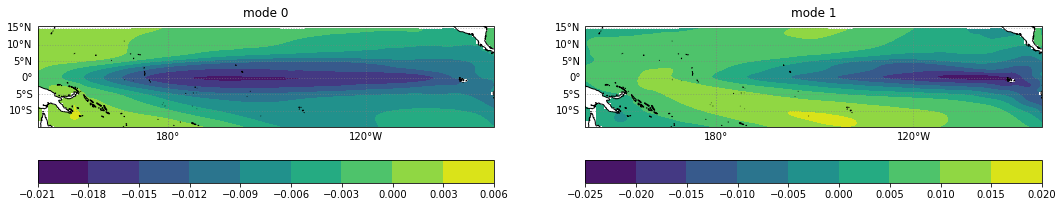

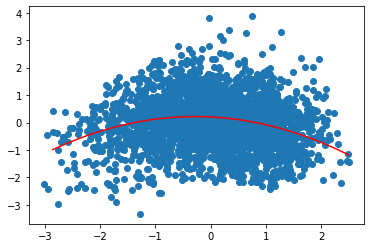

CMCC-CM2-SR5
CMCC-CM2-SR5
CMIP6.ScenarioMIP.CMCC.CMCC-CM2-SR5.ssp585.r1i1p1f1.Omon.tos.gn.v20200622|esgf-data3.diasjp.net downloading
CMIP6.ScenarioMIP.CMCC.CMCC-CM2-SR5.ssp585.r1i1p1f1.Omon.tos.gn.v20200622|esgf-data1.llnl.gov downloading
CMIP6.ScenarioMIP.CMCC.CMCC-CM2-SR5.ssp585.r1i1p1f1.Omon.tos.gn.v20200622|esgf3.dkrz.de downloading
CMIP6.ScenarioMIP.CMCC.CMCC-CM2-SR5.ssp585.r1i1p1f1.Omon.tos.gn.v20200622|esgf-node2.cmcc.it downloading
CMIP6.ScenarioMIP.CMCC.CMCC-CM2-SR5.ssp585.r1i1p1f1.Omon.tos.gn.v20200622|esgf.nci.org.au downloading
CMIP6.ScenarioMIP.CMCC.CMCC-CM2-SR5.ssp585.r1i1p1f1.Omon.tos.gn.v20200622|esgf-data3.ceda.ac.uk downloading
-0.43429965134196014


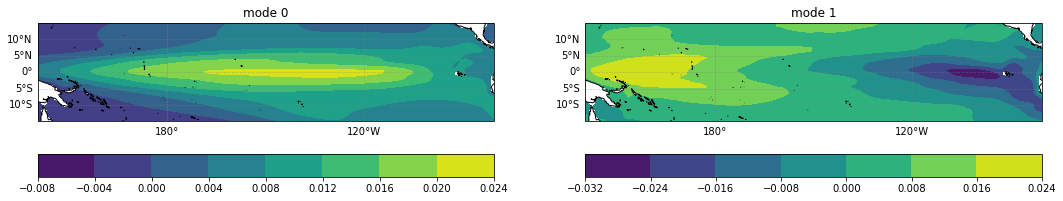

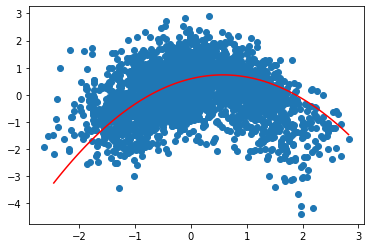

CMCC-ESM2
CMCC-ESM2
CMIP6.CMIP.CMCC.CMCC-ESM2.historical.r1i1p1f1.Omon.tos.gn.v20210114|esgf-data1.llnl.gov downloading
CMIP6.CMIP.CMCC.CMCC-ESM2.historical.r1i1p1f1.Omon.tos.gn.v20210114|esgf-data3.diasjp.net downloading
CMIP6.CMIP.CMCC.CMCC-ESM2.historical.r1i1p1f1.Omon.tos.gn.v20210114|esgf3.dkrz.de downloading
CMIP6.CMIP.CMCC.CMCC-ESM2.historical.r1i1p1f1.Omon.tos.gn.v20210114|esgf-node2.cmcc.it downloading
CMIP6.CMIP.CMCC.CMCC-ESM2.historical.r1i1p1f1.Omon.tos.gn.v20210114|esgf-data3.ceda.ac.uk downloading
CMIP6.ScenarioMIP.CMCC.CMCC-ESM2.ssp585.r1i1p1f1.Omon.tos.gn.v20210126|esgf-data1.llnl.gov downloading
CMIP6.ScenarioMIP.CMCC.CMCC-ESM2.ssp585.r1i1p1f1.Omon.tos.gn.v20210126|esgf-data3.diasjp.net downloading
CMIP6.ScenarioMIP.CMCC.CMCC-ESM2.ssp585.r1i1p1f1.Omon.tos.gn.v20210126|esgf3.dkrz.de downloading
CMIP6.ScenarioMIP.CMCC.CMCC-ESM2.ssp585.r1i1p1f1.Omon.tos.gn.v20210126|esgf-node2.cmcc.it downloading
CMIP6.ScenarioMIP.CMCC.CMCC-ESM2.ssp585.r1i1p1f1.Omon.tos.gn.v20210126|esgf-

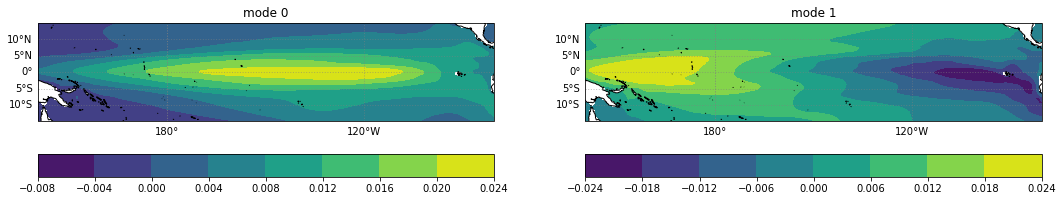

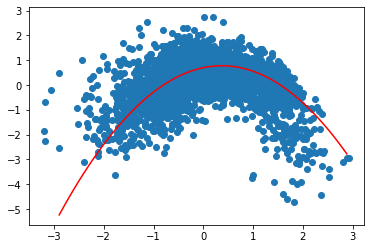

CNRM-CM6-1
CNRM-CM6-1
Unable to allocate 49.7 TiB for an array with shape (13655138112000,) and data type float32
CNRM-ESM2-1
CNRM-ESM2-1
CMIP6.CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.r1i1p1f2.Omon.tos.gn.v20181206|aims3.llnl.gov downloading
CMIP6.CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.r1i1p1f2.Omon.tos.gn.v20181206|esgf-data3.diasjp.net downloading
CMIP6.CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.r1i1p1f2.Omon.tos.gn.v20181206|esgf3.dkrz.de downloading
CMIP6.CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.r1i1p1f2.Omon.tos.gn.v20181206|esg1.umr-cnrm.fr downloading
CMIP6.CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.r1i1p1f2.Omon.tos.gn.v20181206|esgf.nci.org.au downloading
CMIP6.CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.r1i1p1f2.Omon.tos.gn.v20181206|esgf-data3.ceda.ac.uk downloading
CMIP6.ScenarioMIP.CNRM-CERFACS.CNRM-ESM2-1.ssp585.r1i1p1f2.Omon.tos.gn.v20191021|esgf-data1.llnl.gov downloading
CMIP6.ScenarioMIP.CNRM-CERFACS.CNRM-ESM2-1.ssp585.r1i1p1f2.Omon.tos.gn.v20191021|esgf-data3.diasjp.net 

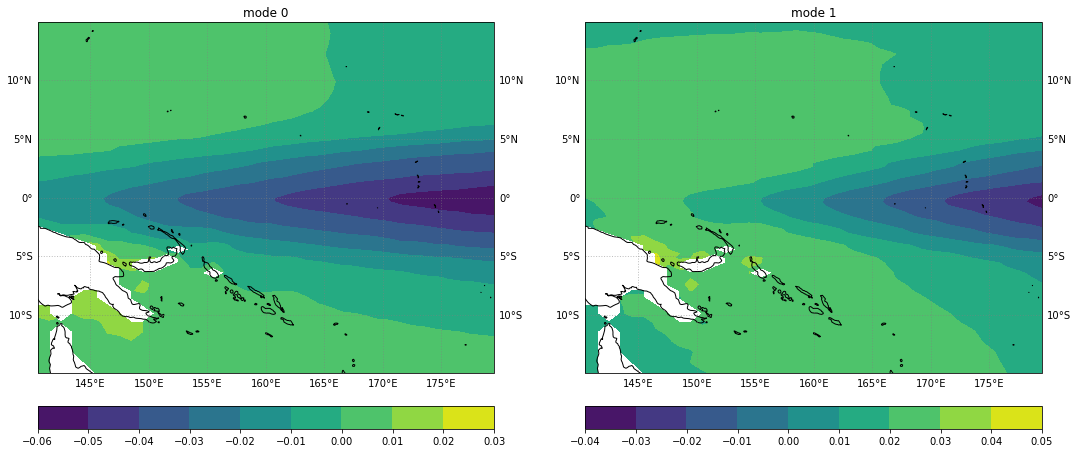

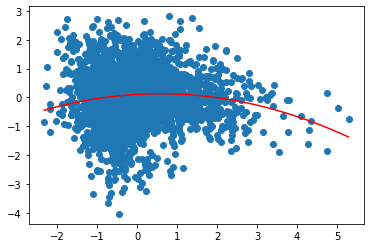

CanESM5
CanESM5
CMIP6.CMIP.CCCma.CanESM5.historical.r1i1p1f1.Omon.tos.gn.v20190429|aims3.llnl.gov downloading
CMIP6.CMIP.CCCma.CanESM5.historical.r1i1p1f1.Omon.tos.gn.v20190429|crd-esgf-drc.ec.gc.ca downloading
CMIP6.CMIP.CCCma.CanESM5.historical.r1i1p1f1.Omon.tos.gn.v20190429|esgf-data3.diasjp.net downloading
CMIP6.CMIP.CCCma.CanESM5.historical.r1i1p1f1.Omon.tos.gn.v20190429|esgf3.dkrz.de downloading
CMIP6.CMIP.CCCma.CanESM5.historical.r1i1p1f1.Omon.tos.gn.v20190429|esgf.nci.org.au downloading
CMIP6.CMIP.CCCma.CanESM5.historical.r1i1p1f1.Omon.tos.gn.v20190429|esgf-data3.ceda.ac.uk downloading
CMIP6.ScenarioMIP.CCCma.CanESM5.ssp585.r1i1p1f1.Omon.tos.gn.v20190429|crd-esgf-drc.ec.gc.ca downloading
CMIP6.ScenarioMIP.CCCma.CanESM5.ssp585.r1i1p1f1.Omon.tos.gn.v20190429|esgf-data1.llnl.gov downloading
CMIP6.ScenarioMIP.CCCma.CanESM5.ssp585.r1i1p1f1.Omon.tos.gn.v20190429|esgf-data3.diasjp.net downloading
CMIP6.ScenarioMIP.CCCma.CanESM5.ssp585.r1i1p1f1.Omon.tos.gn.v20190429|esgf3.dkrz.de downl

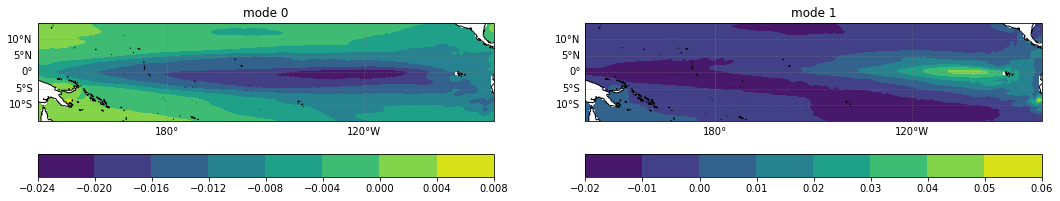

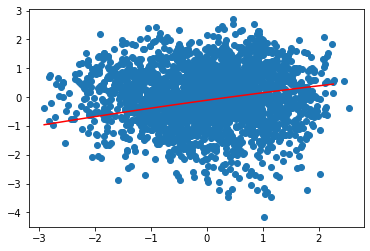

CanESM5-CanOE
CanESM5-CanOE
CMIP6.CMIP.CCCma.CanESM5-CanOE.historical.r1i1p2f1.Omon.tos.gn.v20190429|esgf-data1.llnl.gov downloading
CMIP6.CMIP.CCCma.CanESM5-CanOE.historical.r1i1p2f1.Omon.tos.gn.v20190429|crd-esgf-drc.ec.gc.ca downloading
CMIP6.CMIP.CCCma.CanESM5-CanOE.historical.r1i1p2f1.Omon.tos.gn.v20190429|esgf3.dkrz.de downloading
CMIP6.CMIP.CCCma.CanESM5-CanOE.historical.r1i1p2f1.Omon.tos.gn.v20190429|esgf.nci.org.au downloading
CMIP6.CMIP.CCCma.CanESM5-CanOE.historical.r1i1p2f1.Omon.tos.gn.v20190429|esgf-data3.ceda.ac.uk downloading
CMIP6.ScenarioMIP.CCCma.CanESM5-CanOE.ssp585.r1i1p2f1.Omon.tos.gn.v20190429|esgf-data1.llnl.gov downloading
CMIP6.ScenarioMIP.CCCma.CanESM5-CanOE.ssp585.r1i1p2f1.Omon.tos.gn.v20190429|crd-esgf-drc.ec.gc.ca downloading
CMIP6.ScenarioMIP.CCCma.CanESM5-CanOE.ssp585.r1i1p2f1.Omon.tos.gn.v20190429|esgf3.dkrz.de downloading
CMIP6.ScenarioMIP.CCCma.CanESM5-CanOE.ssp585.r1i1p2f1.Omon.tos.gn.v20190429|esgf.nci.org.au downloading
CMIP6.ScenarioMIP.CCCma.CanES

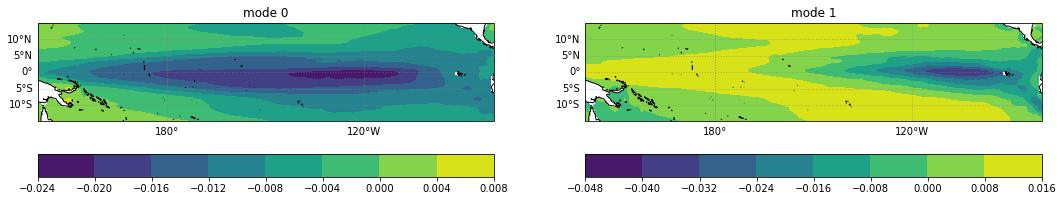

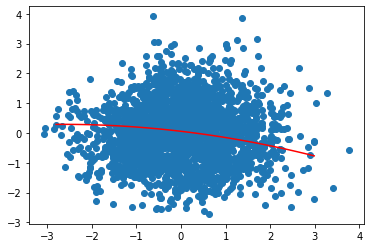

EC-Earth3
EC-Earth3
CMIP6.CMIP.EC-Earth-Consortium.EC-Earth3.historical.r1i1p1f1.Omon.tos.gn.v20200918|esgf-data3.diasjp.net downloading
CMIP6.CMIP.EC-Earth-Consortium.EC-Earth3.historical.r1i1p1f1.Omon.tos.gn.v20200918|esgf-data1.llnl.gov downloading
CMIP6.CMIP.EC-Earth-Consortium.EC-Earth3.historical.r1i1p1f1.Omon.tos.gn.v20200918|esgf3.dkrz.de downloading
CMIP6.CMIP.EC-Earth-Consortium.EC-Earth3.historical.r1i1p1f1.Omon.tos.gn.v20200918|esg-dn2.nsc.liu.se downloading
CMIP6.CMIP.EC-Earth-Consortium.EC-Earth3.historical.r1i1p1f1.Omon.tos.gn.v20200918|esgf-data3.ceda.ac.uk downloading
CMIP6.ScenarioMIP.EC-Earth-Consortium.EC-Earth3.ssp585.r1i1p1f1.Omon.tos.gn.v20200918|esgf-data3.diasjp.net downloading
CMIP6.ScenarioMIP.EC-Earth-Consortium.EC-Earth3.ssp585.r1i1p1f1.Omon.tos.gn.v20200918|esgf-data1.llnl.gov downloading
CMIP6.ScenarioMIP.EC-Earth-Consortium.EC-Earth3.ssp585.r1i1p1f1.Omon.tos.gn.v20200918|esgf3.dkrz.de downloading
CMIP6.ScenarioMIP.EC-Earth-Consortium.EC-Earth3.ssp585.r1i

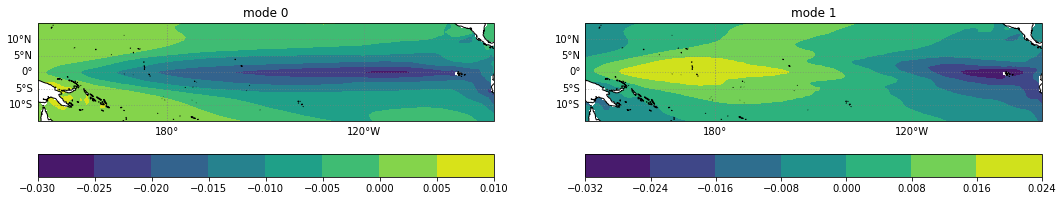

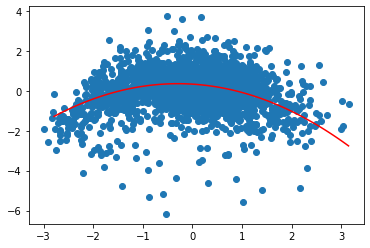

EC-Earth3-CC
EC-Earth3-CC
CMIP6.CMIP.EC-Earth-Consortium.EC-Earth3-CC.historical.r1i1p1f1.Omon.tos.gn.v20210113|esgf-data1.llnl.gov downloading
CMIP6.CMIP.EC-Earth-Consortium.EC-Earth3-CC.historical.r1i1p1f1.Omon.tos.gn.v20210113|esgf-data3.diasjp.net downloading
CMIP6.CMIP.EC-Earth-Consortium.EC-Earth3-CC.historical.r1i1p1f1.Omon.tos.gn.v20210113|esgf3.dkrz.de downloading
CMIP6.CMIP.EC-Earth-Consortium.EC-Earth3-CC.historical.r1i1p1f1.Omon.tos.gn.v20210113|esgf.bsc.es downloading
CMIP6.CMIP.EC-Earth-Consortium.EC-Earth3-CC.historical.r1i1p1f1.Omon.tos.gn.v20210113|esgf-data3.ceda.ac.uk downloading
CMIP6.ScenarioMIP.EC-Earth-Consortium.EC-Earth3-CC.ssp585.r1i1p1f1.Omon.tos.gn.v20210113|esgf-data1.llnl.gov downloading
CMIP6.ScenarioMIP.EC-Earth-Consortium.EC-Earth3-CC.ssp585.r1i1p1f1.Omon.tos.gn.v20210113|esgf-data3.diasjp.net downloading
CMIP6.ScenarioMIP.EC-Earth-Consortium.EC-Earth3-CC.ssp585.r1i1p1f1.Omon.tos.gn.v20210113|esgf3.dkrz.de downloading
CMIP6.ScenarioMIP.EC-Earth-Consorti

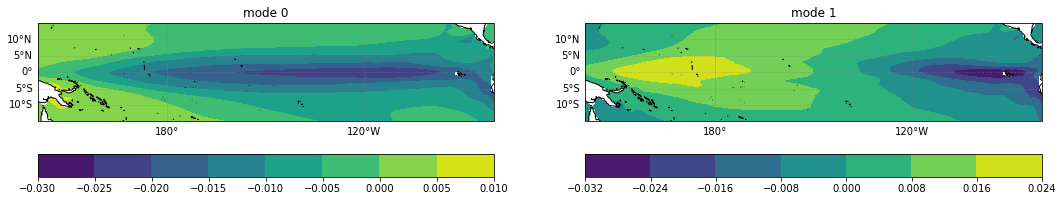

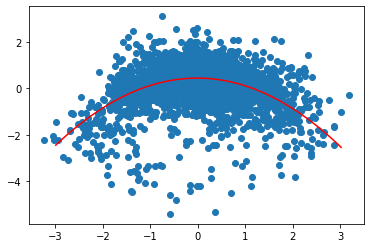

EC-Earth3-Veg
EC-Earth3-Veg
-0.21269852302678163


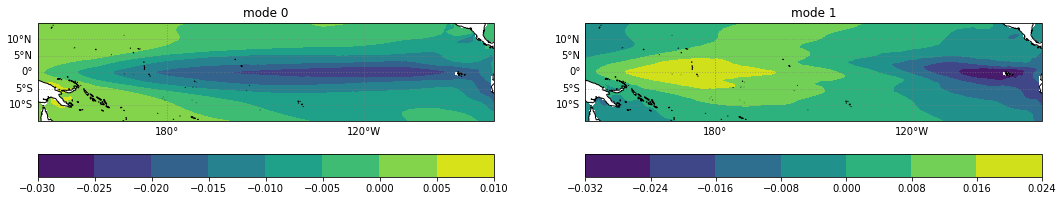

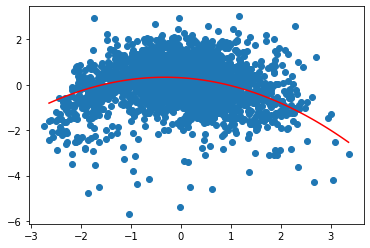

EC-Earth3-Veg-LR
EC-Earth3-Veg-LR
CMIP6.CMIP.EC-Earth-Consortium.EC-Earth3-Veg-LR.historical.r1i1p1f1.Omon.tos.gn.v20200919|esgf-data3.diasjp.net downloading
CMIP6.CMIP.EC-Earth-Consortium.EC-Earth3-Veg-LR.historical.r1i1p1f1.Omon.tos.gn.v20200919|esgf-data1.llnl.gov downloading
CMIP6.CMIP.EC-Earth-Consortium.EC-Earth3-Veg-LR.historical.r1i1p1f1.Omon.tos.gn.v20200919|esgf3.dkrz.de downloading
CMIP6.CMIP.EC-Earth-Consortium.EC-Earth3-Veg-LR.historical.r1i1p1f1.Omon.tos.gn.v20200919|esg-dn1.nsc.liu.se downloading
CMIP6.CMIP.EC-Earth-Consortium.EC-Earth3-Veg-LR.historical.r1i1p1f1.Omon.tos.gn.v20200919|esgf-data3.ceda.ac.uk downloading
CMIP6.ScenarioMIP.EC-Earth-Consortium.EC-Earth3-Veg-LR.ssp585.r1i1p1f1.Omon.tos.gn.v20201201|esgf-data1.llnl.gov downloading
CMIP6.ScenarioMIP.EC-Earth-Consortium.EC-Earth3-Veg-LR.ssp585.r1i1p1f1.Omon.tos.gn.v20201201|esgf-data3.diasjp.net downloading
CMIP6.ScenarioMIP.EC-Earth-Consortium.EC-Earth3-Veg-LR.ssp585.r1i1p1f1.Omon.tos.gn.v20201201|esgf3.dkrz.de 

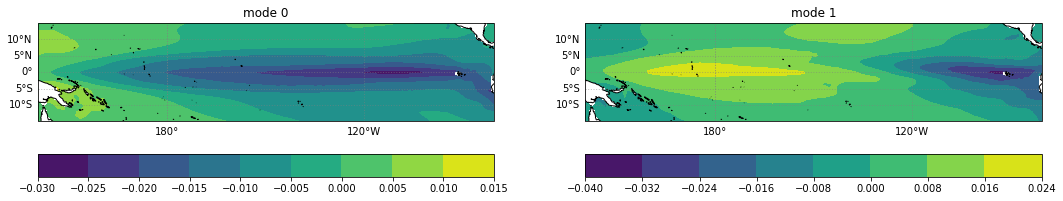

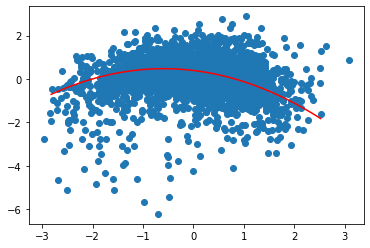

GFDL-CM4
GFDL-CM4
CMIP6.CMIP.NOAA-GFDL.GFDL-CM4.historical.r1i1p1f1.Omon.tos.gn.v20180701|aims3.llnl.gov downloading
CMIP6.CMIP.NOAA-GFDL.GFDL-CM4.historical.r1i1p1f1.Omon.tos.gn.v20180701|esgf-data3.diasjp.net downloading
CMIP6.CMIP.NOAA-GFDL.GFDL-CM4.historical.r1i1p1f1.Omon.tos.gn.v20180701|esgf3.dkrz.de downloading
CMIP6.CMIP.NOAA-GFDL.GFDL-CM4.historical.r1i1p1f1.Omon.tos.gn.v20180701|esgdata.gfdl.noaa.gov downloading
CMIP6.CMIP.NOAA-GFDL.GFDL-CM4.historical.r1i1p1f1.Omon.tos.gn.v20180701|esgf-data3.ceda.ac.uk downloading
CMIP6.ScenarioMIP.NOAA-GFDL.GFDL-CM4.ssp585.r1i1p1f1.Omon.tos.gn.v20180701|aims3.llnl.gov downloading
CMIP6.ScenarioMIP.NOAA-GFDL.GFDL-CM4.ssp585.r1i1p1f1.Omon.tos.gn.v20180701|esgf-data3.diasjp.net downloading
CMIP6.ScenarioMIP.NOAA-GFDL.GFDL-CM4.ssp585.r1i1p1f1.Omon.tos.gn.v20180701|esgf3.dkrz.de downloading
CMIP6.ScenarioMIP.NOAA-GFDL.GFDL-CM4.ssp585.r1i1p1f1.Omon.tos.gn.v20180701|esgf.nci.org.au downloading
CMIP6.ScenarioMIP.NOAA-GFDL.GFDL-CM4.ssp585.r1i1p1f1

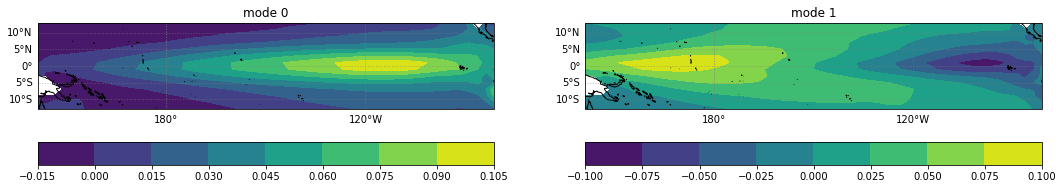

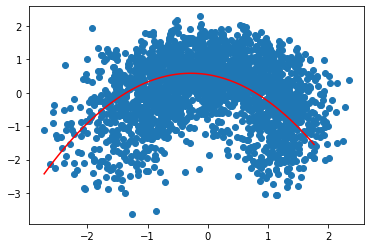

HadGEM3-GC31-LL
HadGEM3-GC31-LL
CMIP6.CMIP.MOHC.HadGEM3-GC31-LL.historical.r1i1p1f3.Omon.tos.gn.v20190624|aims3.llnl.gov downloading
CMIP6.CMIP.MOHC.HadGEM3-GC31-LL.historical.r1i1p1f3.Omon.tos.gn.v20190624|esgf-data3.diasjp.net downloading
CMIP6.CMIP.MOHC.HadGEM3-GC31-LL.historical.r1i1p1f3.Omon.tos.gn.v20190624|esgf3.dkrz.de downloading
CMIP6.CMIP.MOHC.HadGEM3-GC31-LL.historical.r1i1p1f3.Omon.tos.gn.v20190624|esgf-data3.ceda.ac.uk downloading
CMIP6.ScenarioMIP.MOHC.HadGEM3-GC31-LL.ssp585.r1i1p1f3.Omon.tos.gn.v20200114|esgf-data1.llnl.gov downloading
CMIP6.ScenarioMIP.MOHC.HadGEM3-GC31-LL.ssp585.r1i1p1f3.Omon.tos.gn.v20200114|esgf-data3.diasjp.net downloading
CMIP6.ScenarioMIP.MOHC.HadGEM3-GC31-LL.ssp585.r1i1p1f3.Omon.tos.gn.v20200114|esgf3.dkrz.de downloading
CMIP6.ScenarioMIP.MOHC.HadGEM3-GC31-LL.ssp585.r1i1p1f3.Omon.tos.gn.v20200114|esgf-data3.ceda.ac.uk downloading
-0.14892649284433154


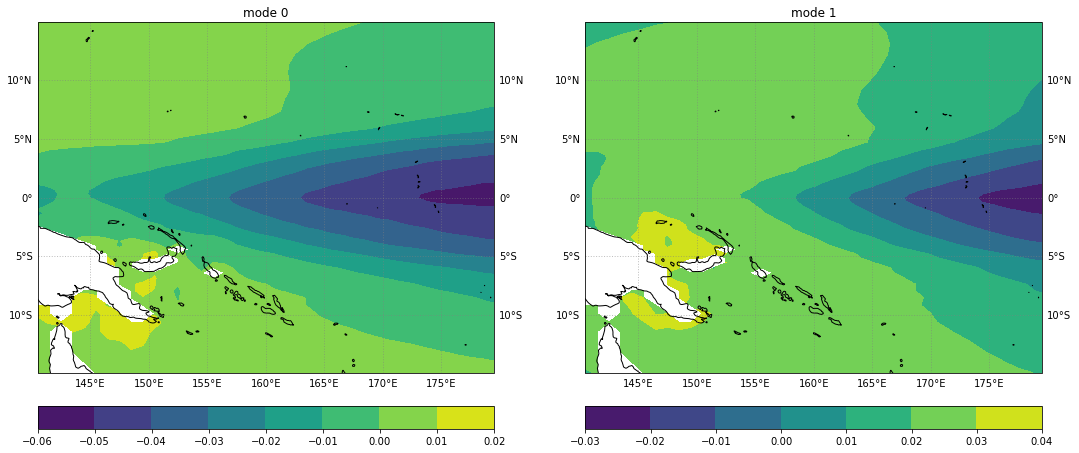

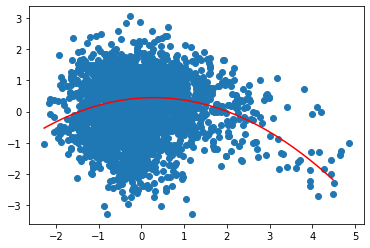

HadGEM3-GC31-MM
HadGEM3-GC31-MM
CMIP6.CMIP.MOHC.HadGEM3-GC31-MM.historical.r1i1p1f3.Omon.tos.gn.v20191207|esgf-data1.llnl.gov downloading
CMIP6.CMIP.MOHC.HadGEM3-GC31-MM.historical.r1i1p1f3.Omon.tos.gn.v20191207|esgf-data3.diasjp.net downloading
CMIP6.CMIP.MOHC.HadGEM3-GC31-MM.historical.r1i1p1f3.Omon.tos.gn.v20191207|esgf3.dkrz.de downloading
CMIP6.CMIP.MOHC.HadGEM3-GC31-MM.historical.r1i1p1f3.Omon.tos.gn.v20191207|esgf-data3.ceda.ac.uk downloading
CMIP6.ScenarioMIP.MOHC.HadGEM3-GC31-MM.ssp585.r1i1p1f3.Omon.tos.gn.v20200515|esgf-data3.diasjp.net downloading
CMIP6.ScenarioMIP.MOHC.HadGEM3-GC31-MM.ssp585.r1i1p1f3.Omon.tos.gn.v20200515|esgf-data1.llnl.gov downloading
CMIP6.ScenarioMIP.MOHC.HadGEM3-GC31-MM.ssp585.r1i1p1f3.Omon.tos.gn.v20200515|esgf3.dkrz.de downloading
CMIP6.ScenarioMIP.MOHC.HadGEM3-GC31-MM.ssp585.r1i1p1f3.Omon.tos.gn.v20200515|esgf-data3.ceda.ac.uk downloading
-0.10947586352607609


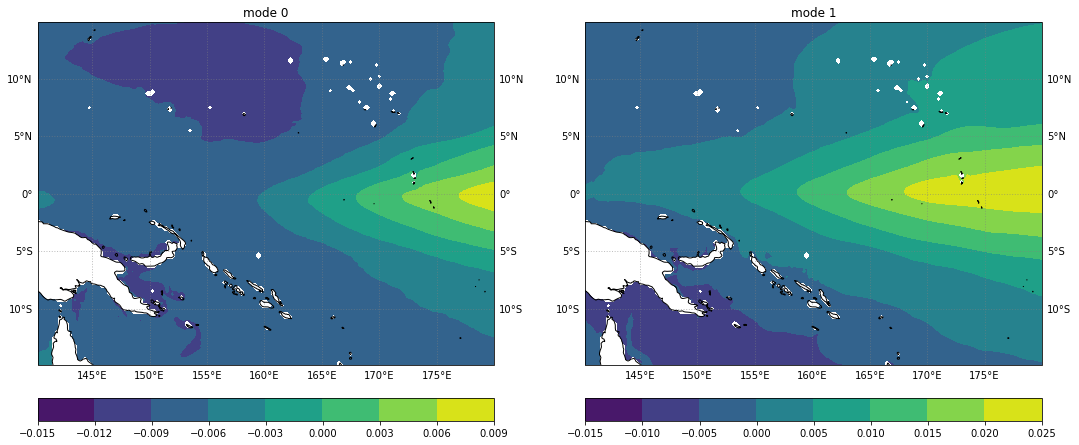

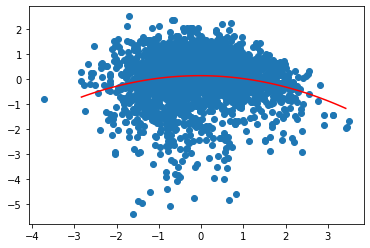

INM-CM4-8
INM-CM4-8
INM-CM4-8tos_Omonhistoricalr1i1p1f1 file not found on ESGF
Files (filter term: tos_Omon_.*?INM-CM4-8_historical_r1i1p1f1_.*?\.nc ) not found, possibly test name is wrong
INM-CM5-0
INM-CM5-0
INM-CM5-0tos_Omonhistoricalr1i1p1f1 file not found on ESGF
Files (filter term: tos_Omon_.*?INM-CM5-0_historical_r1i1p1f1_.*?\.nc ) not found, possibly test name is wrong
IPSL-CM6A-LR
IPSL-CM6A-LR
CMIP6.CMIP.IPSL.IPSL-CM6A-LR.historical.r1i1p1f1.Omon.tos.gn.v20180803|aims3.llnl.gov downloading
CMIP6.CMIP.IPSL.IPSL-CM6A-LR.historical.r1i1p1f1.Omon.tos.gn.v20180803|esgf-data3.diasjp.net downloading
CMIP6.CMIP.IPSL.IPSL-CM6A-LR.historical.r1i1p1f1.Omon.tos.gn.v20180803|esgf3.dkrz.de downloading
CMIP6.CMIP.IPSL.IPSL-CM6A-LR.historical.r1i1p1f1.Omon.tos.gn.v20180803|vesg.ipsl.upmc.fr downloading
CMIP6.CMIP.IPSL.IPSL-CM6A-LR.historical.r1i1p1f1.Omon.tos.gn.v20180803|esgf.nci.org.au downloading
CMIP6.CMIP.IPSL.IPSL-CM6A-LR.historical.r1i1p1f1.Omon.tos.gn.v20180803|esgf-data3.ceda.ac.uk d

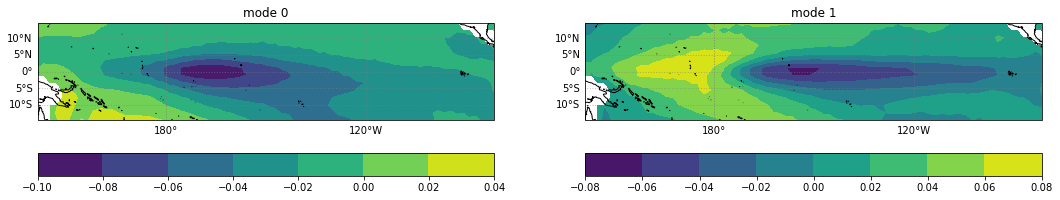

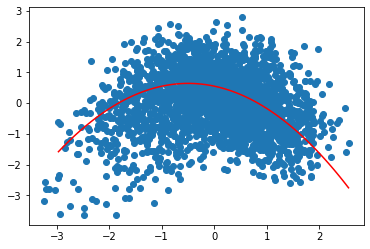

MIROC-ES2L
MIROC-ES2L
-0.5915744333554288


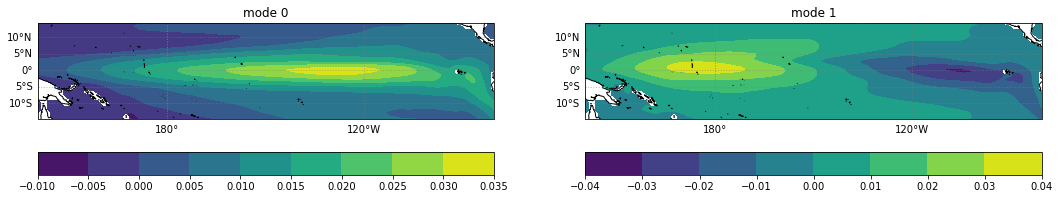

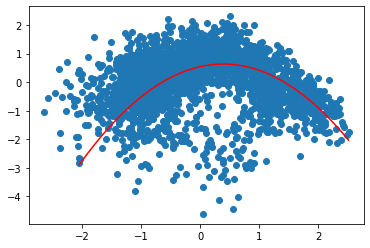

MIROC6
MIROC6
-0.5310239567544549


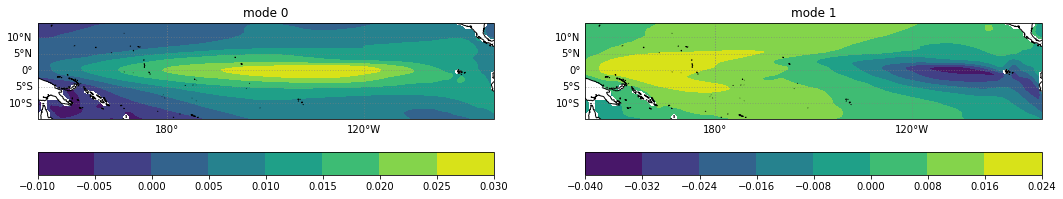

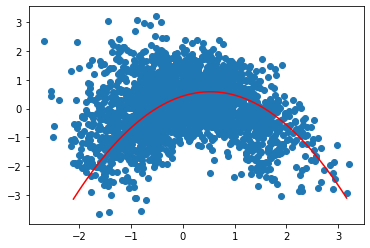

MPI-ESM1-2-HR
MPI-ESM1-2-HR
-0.28062107123649466


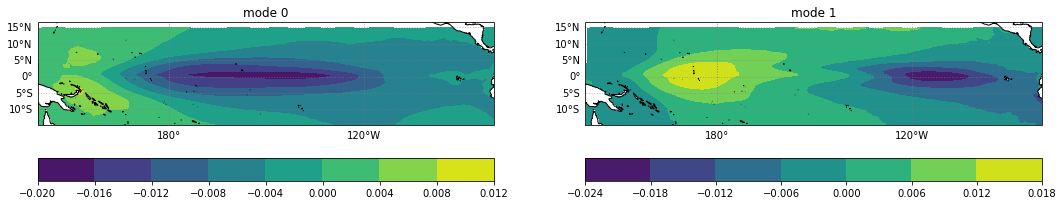

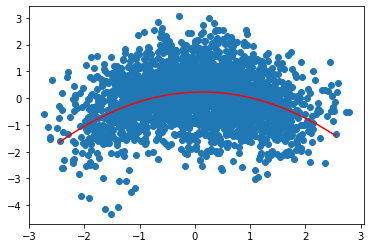

MPI-ESM1-2-LR
MPI-ESM1-2-LR
-0.28238812051612444


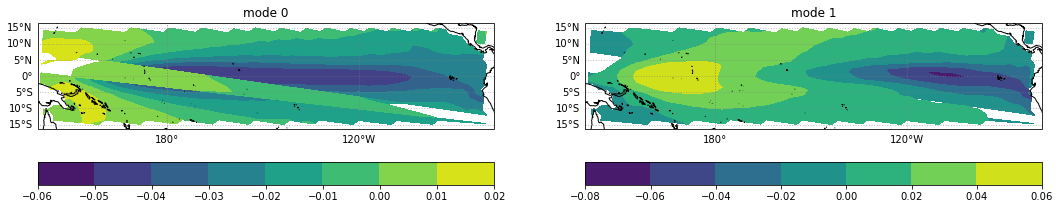

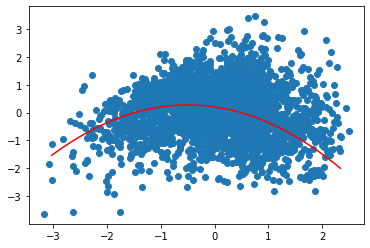

MRI-ESM2-0
MRI-ESM2-0
-0.3336697025006727


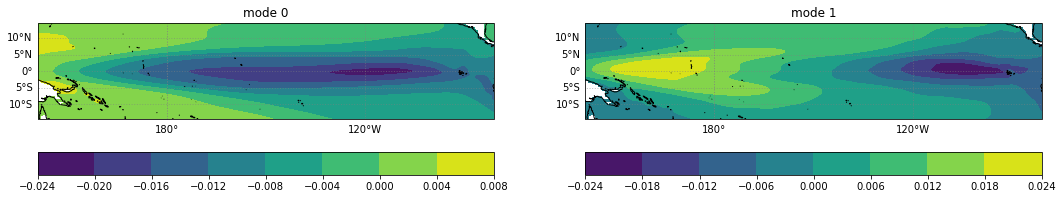

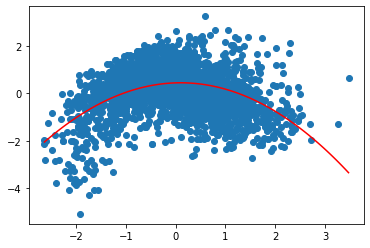

NESM3
NESM3
CMIP6.ScenarioMIP.NUIST.NESM3.ssp585.r1i1p1f1.Omon.tos.gn.v20190731|esg.lasg.ac.cn downloading
CMIP6.ScenarioMIP.NUIST.NESM3.ssp585.r1i1p1f1.Omon.tos.gn.v20190731|esgf-data1.llnl.gov downloading
CMIP6.ScenarioMIP.NUIST.NESM3.ssp585.r1i1p1f1.Omon.tos.gn.v20190731|esgf-data3.diasjp.net downloading
CMIP6.ScenarioMIP.NUIST.NESM3.ssp585.r1i1p1f1.Omon.tos.gn.v20190731|esgf3.dkrz.de downloading
CMIP6.ScenarioMIP.NUIST.NESM3.ssp585.r1i1p1f1.Omon.tos.gn.v20190731|esgf.nci.org.au downloading
CMIP6.ScenarioMIP.NUIST.NESM3.ssp585.r1i1p1f1.Omon.tos.gn.v20190731|esgf-data3.ceda.ac.uk downloading
-0.027771596150393454


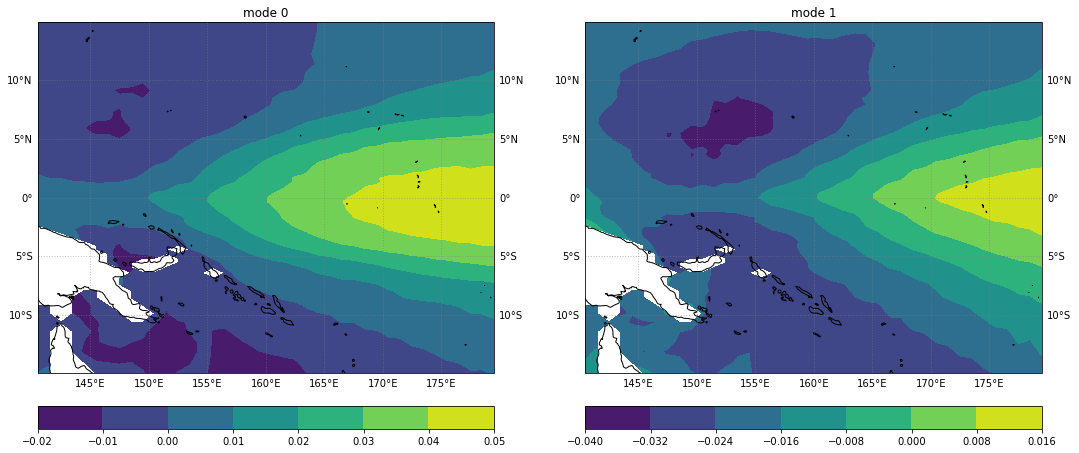

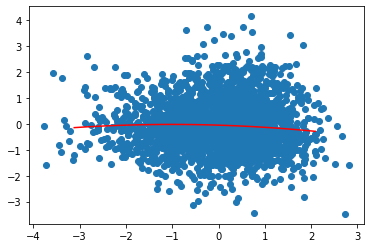

NorESM2-LM
NorESM2-LM
-0.2503459000614625


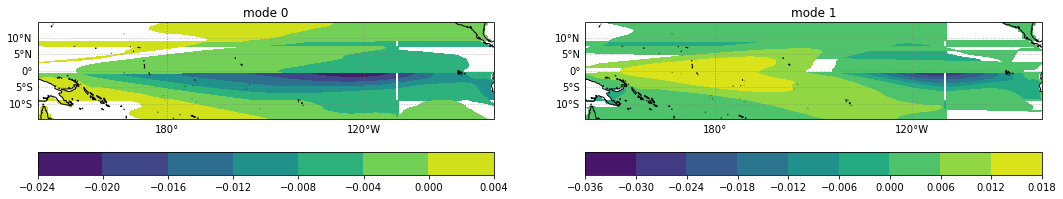

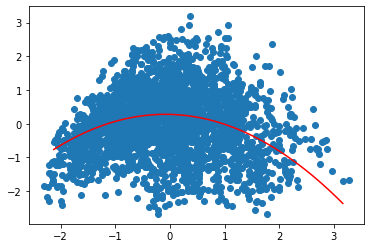

NorESM2-MM
NorESM2-MM
-0.24241261099027753


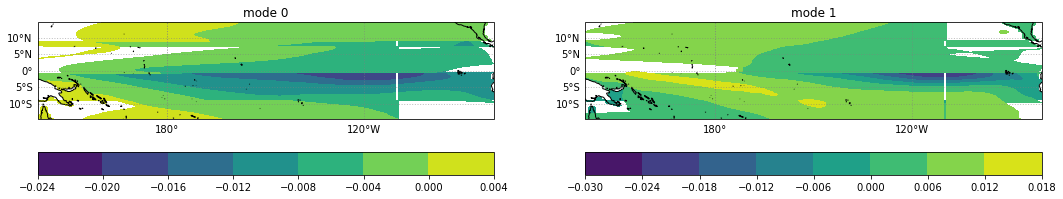

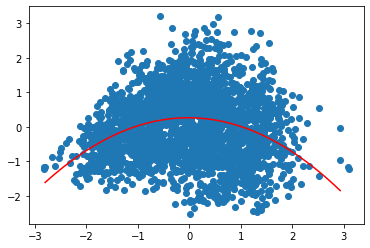

UKESM1-0-LL
UKESM1-0-LL
CMIP6.CMIP.MOHC.UKESM1-0-LL.historical.r1i1p1f2.Omon.tos.gn.v20190627|aims3.llnl.gov downloading
CMIP6.CMIP.MOHC.UKESM1-0-LL.historical.r1i1p1f2.Omon.tos.gn.v20190627|esgf-data3.diasjp.net downloading
CMIP6.CMIP.MOHC.UKESM1-0-LL.historical.r1i1p1f2.Omon.tos.gn.v20190627|esgf3.dkrz.de downloading
CMIP6.CMIP.MOHC.UKESM1-0-LL.historical.r1i1p1f2.Omon.tos.gn.v20190627|esgf.nci.org.au downloading
CMIP6.CMIP.MOHC.UKESM1-0-LL.historical.r1i1p1f2.Omon.tos.gn.v20190627|esgf-data3.ceda.ac.uk downloading
CMIP6.ScenarioMIP.MOHC.UKESM1-0-LL.ssp585.r1i1p1f2.Omon.tos.gn.v20190726|aims3.llnl.gov downloading
CMIP6.ScenarioMIP.MOHC.UKESM1-0-LL.ssp585.r1i1p1f2.Omon.tos.gn.v20190726|esgf-data3.diasjp.net downloading
CMIP6.ScenarioMIP.MOHC.UKESM1-0-LL.ssp585.r1i1p1f2.Omon.tos.gn.v20190726|esgf3.dkrz.de downloading
CMIP6.ScenarioMIP.MOHC.UKESM1-0-LL.ssp585.r1i1p1f2.Omon.tos.gn.v20190726|esgf.nci.org.au downloading
CMIP6.ScenarioMIP.MOHC.UKESM1-0-LL.ssp585.r1i1p1f2.Omon.tos.gn.v201907

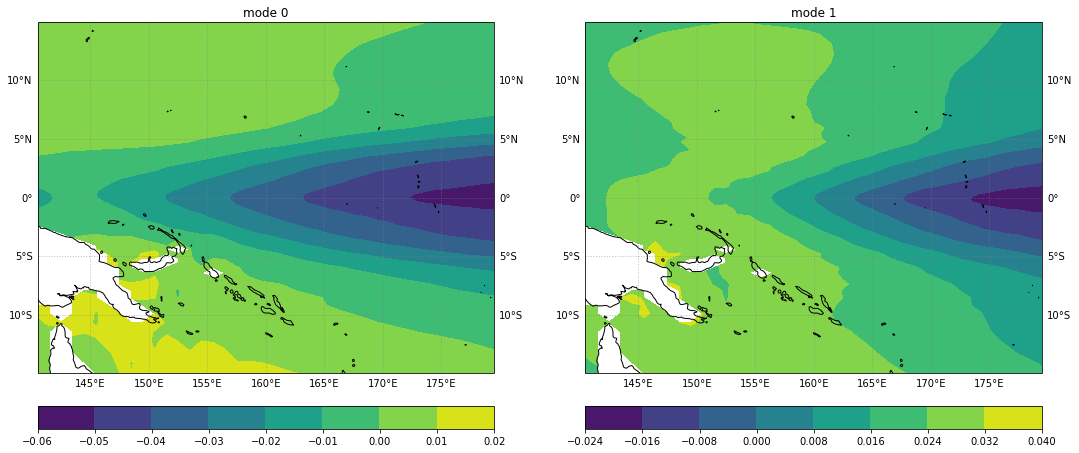

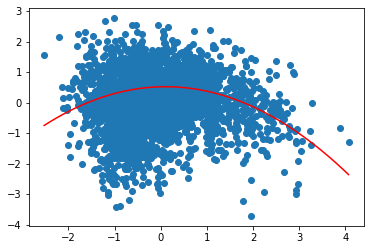

In [9]:
%run utils/ecIndex.ipynb

eofList = list()

for iModel in modelSet:
    try:
        print(iModel[1])
        eofSolver=solver(iModel)

        indeces, pFit, eofsXr = ecIndex(eofSolver)
        indeces['model']=iModel[1]

        print(indeces.alpha.values)
        
        eofList.append(indeces)

        fig=plt.figure(figsize=(18,12))

        for mode in [0,1]:
            ax=fig.add_subplot(1,2,mode+1,
                           projection=ccrs.Miller(central_longitude=210))

            ensoPlotter(eofsXr.sel(mode=mode), ax)

            plt.title("mode " + str(mode))

        plt.show()

        fig = plt.figure()

        plt.scatter(indeces.pc1, indeces.pc2)

        plt.plot(*pFit.linspace(), 'r')
        
        plt.show()
        
    except Exception as e:
        print(e)

Models can be chosen on some criteria

alpha < -0.15 looks appropriate from Cai et al 2018, however as the methodology doesn't match exactly, this is probably not right and should be calculated from observations.

In [15]:
ecXr=xarray.concat(eofList, 'model')

In [22]:
ecXr.model.values

array(['ACCESS-CM2', 'ACCESS-ESM1-5', 'AWI-CM-1-1-MR', 'CAMS-CSM1-0',
       'CAS-ESM2-0', 'CESM2', 'CESM2-WACCM', 'CIESM', 'CMCC-CM2-SR5',
       'CMCC-ESM2', 'CNRM-ESM2-1', 'CanESM5', 'CanESM5-CanOE',
       'EC-Earth3', 'EC-Earth3-CC', 'EC-Earth3-Veg', 'EC-Earth3-Veg-LR',
       'GISS-E2-1-G', 'HadGEM3-GC31-LL', 'HadGEM3-GC31-MM', 'MCM-UA-1-0',
       'MIROC-ES2L', 'MIROC6', 'MPI-ESM1-2-HR', 'MPI-ESM1-2-LR',
       'MRI-ESM2-0', 'NESM3', 'NorESM2-LM', 'NorESM2-MM', 'UKESM1-0-LL'],
      dtype='<U16')

In [31]:
for i in range(0,30):
    ds=ecXr.isel(model=i)
    print(str(ds.model.values) + ' : ' + str(ds.alpha.values))

ACCESS-CM2 : -0.1468771787638482
ACCESS-ESM1-5 : -0.1354072866028132
AWI-CM-1-1-MR : -0.2564307195863501
CAMS-CSM1-0 : -0.27202578230368096
CAS-ESM2-0 : -0.23754403416699432
CESM2 : -0.19426137531583706
CESM2-WACCM : -0.22208288864814313
CIESM : -0.1813567221628331
CMCC-CM2-SR5 : -0.43429965134196014
CMCC-ESM2 : -0.5638111206975835
CNRM-ESM2-1 : -0.06770185874296662
CanESM5 : -0.008716833412763013
CanESM5-CanOE : -0.03334618581693477
EC-Earth3 : -0.26311707174966326
EC-Earth3-CC : -0.32442642706126634
EC-Earth3-Veg : -0.21269852302678163
EC-Earth3-Veg-LR : -0.23663704306451647
GISS-E2-1-G : -0.5065199017342733
HadGEM3-GC31-LL : -0.14892649284433154
HadGEM3-GC31-MM : -0.10947586352607609
MCM-UA-1-0 : -0.362937161208987
MIROC-ES2L : -0.5915744333554288
MIROC6 : -0.5310239567544549
MPI-ESM1-2-HR : -0.28062107123649466
MPI-ESM1-2-LR : -0.28238812051612444
MRI-ESM2-0 : -0.3336697025006727
NESM3 : -0.027771596150393454
NorESM2-LM : -0.2503459000614625
NorESM2-MM : -0.24241261099027753
UKESM1

In [41]:
wangAnswer=modelSet[[4,9,#11,
                     12,15,17,30,29,22,31,32,33,21,6,7,35,36,#20,
                     8],:]

In [42]:
for i in wangAnswer:
    ds=ecXr.sel(model=i[1])
    print(str(ds.model.values) + ' : ' + str(ds.alpha.values) + '   ' + i[3])

CAMS-CSM1-0 : -0.27202578230368096   r1i1p1f1
CMCC-CM2-SR5 : -0.43429965134196014   r1i1p1f1
CNRM-ESM2-1 : -0.06770185874296662   r1i1p1f2
EC-Earth3 : -0.26311707174966326   r1i1p1f1
EC-Earth3-Veg : -0.21269852302678163   r1i1p1f1
MIROC6 : -0.5310239567544549   r1i1p1f1
MIROC-ES2L : -0.5915744333554288   r1i1p1f2
HadGEM3-GC31-LL : -0.14892649284433154   r1i1p1f3
MPI-ESM1-2-HR : -0.28062107123649466   r1i1p1f1
MPI-ESM1-2-LR : -0.28238812051612444   r1i1p1f1
MRI-ESM2-0 : -0.3336697025006727   r1i1p1f1
GISS-E2-1-G : -0.5065199017342733   r1i1p1f2
CESM2 : -0.19426137531583706   r10i1p1f1
CESM2-WACCM : -0.22208288864814313   r1i1p1f1
NorESM2-LM : -0.2503459000614625   r1i1p1f1
NorESM2-MM : -0.24241261099027753   r1i1p1f1
CIESM : -0.1813567221628331   r1i1p1f1
